<a href="https://colab.research.google.com/github/marcool5/Cyber/blob/main/Marcool_Cyber_Dataset_ML_Methods_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first step that we must begin is to understand the dataset model that we will be using in this paper to start the data analysis or use machine learning models that help us generate more accurate results by using training models.
The dataset that we will be analysing is UNSW-NB15 (University of New South Wales - Network Behavior 2015). This dataset is used as an analysis data load for cybersecurity research on the artifacts that are part of a network infrastructure.
Objective
This dataset is intended for analysing cybersecurity-related studies and network intrusion detection systems (NIDS). It includes network traffic information to model different network threats.
Data Scheme
The UNSW-NB15 dataset is in the CSV file format, which makes analysis and machine learning easy. Significant files are:
The core dataset containing a variety of attributes taken from network traffic data is contained in UNSW-NB15_1.csv. Every row represents a network link or flow.
The "attack types" for each network flow in the primary dataset are contained in UNSW-NB15_2.csv. Network flows and certain attack categories are connected in this file.
Typical aspects of the primary dataset (UNSW-NB15_1.csv) include the following data fields.


In [17]:
#Import modules and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('ggplot')
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# sklearn for train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Embedding
from keras.optimizers import Adam
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/UNSW_NB15_training-set_v1.csv')

In [18]:
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [19]:
data.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [21]:
data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [22]:
data_to_use=data.isnull().sum()
data_to_use.shape

(45,)

In [25]:
from pandas.core.series import Axis
# Load the UNSW-NB15 training dataset
train_data = pd.read_csv('/content/drive/MyDrive/dataset/UNSW_NB15_training-set_v1.csv')
# Drop unnecessary columns.
train_data = train_data.drop(columns=['proto', 'state', 'service', 'ct_src_ltm', 'ct_dst_ltm', 'attack_cat'],axis=1)
train_data = train_data.fillna(0)
# Separate features (X_train) and target labels (y_train)
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
# Create and train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
# Save the trained model to a file using joblib
model_filename = 'traning_model.pkl'
joblib.dump(clf, model_filename)
print(f"model saved as '{model_filename}'.")

model saved as 'traning_model.pkl'.


In [28]:
test_data = pd.read_csv('/content/drive/MyDrive/dataset/UNSW_NB15_training-set_v1.csv')

test_data = test_data.drop(columns=['proto', 'state', 'service', 'ct_src_ltm', 'ct_dst_ltm', 'attack_cat'],axis=1)
test_data = test_data.fillna(0)

X_test = test_data.drop(columns=['label'])
y_test = test_data['label']

clf = joblib.load('traning_model.pkl')

y_pred = clf.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[37000     0]
 [    0 45332]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37000
           1       1.00      1.00      1.00     45332

    accuracy                           1.00     82332
   macro avg       1.00      1.00      1.00     82332
weighted avg       1.00      1.00      1.00     82332



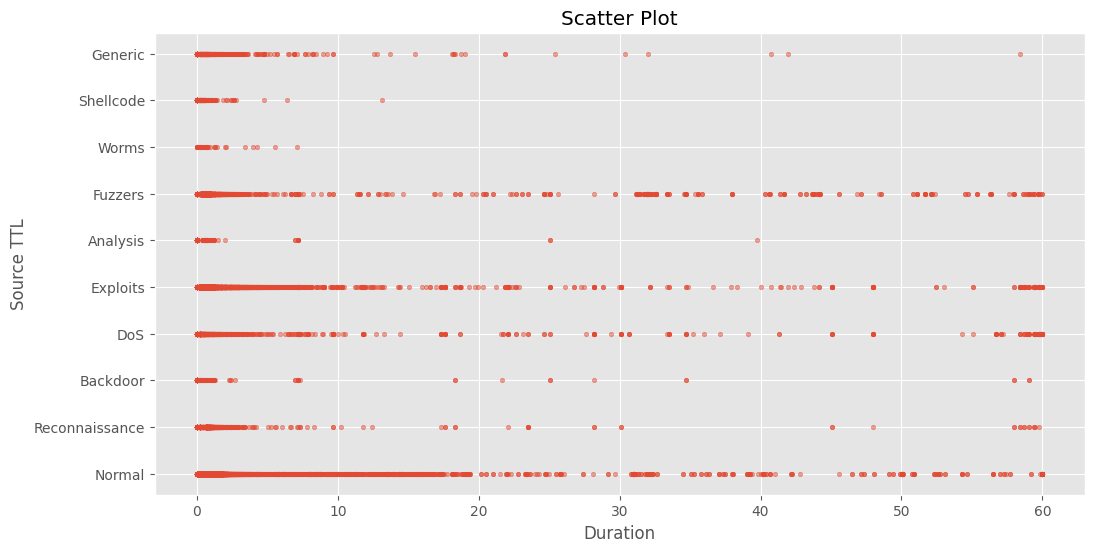

In [29]:
x = data['dur']
y = data['attack_cat']

#scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, s=10, alpha=0.5)
plt.xlabel('Duration')
plt.ylabel('Source TTL')
plt.title('Scatter Plot')
plt.show()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/UNSW_NB15_training-set_v1.csv')
X = data.drop(columns=['proto','service','state','attack_cat'])
y = data['attack_cat']  # Target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, return_sequences=True, input_shape=(1, X_train.shape[2])))
model_lstm.add(LSTM(units=64, return_sequences=True))
model_lstm.add(LSTM(units=64))
model_lstm.add(Dense(1, activation='sigmoid'))  # Adjust the number of units for your classification task
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
accuracy_lstm = model_lstm.evaluate(X_test, y_test)[1]
print(f"LSTM Accuracy: {accuracy_lstm}")

# Define and compile the BiLSTM model
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(1, X_train.shape[2])))
model_bilstm.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model_bilstm.add(Bidirectional(LSTM(units=64)))
model_bilstm.add(Dense(1, activation='sigmoid'))  # Adjust the number of units for your classification task

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_bilstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

accuracy_bilstm = model_bilstm.evaluate(X_test, y_test)[1]
print(f"BiLSTM Accuracy: {accuracy_bilstm}")


Epoch 1/10
1647/1647 [==============================] - 31s 11ms/step - loss: -213.0141 - accuracy: 0.0071 - val_loss: -381.9431 - val_accuracy: 0.0069
Epoch 2/10
1647/1647 [==============================] - 16s 9ms/step - loss: -547.1895 - accuracy: 0.0071 - val_loss: -708.1416 - val_accuracy: 0.0069
Epoch 3/10
1647/1647 [==============================] - 13s 8ms/step - loss: -874.0757 - accuracy: 0.0071 - val_loss: -1033.5532 - val_accuracy: 0.0069
Epoch 4/10
1647/1647 [==============================] - 13s 8ms/step - loss: -1200.2404 - accuracy: 0.0071 - val_loss: -1358.1095 - val_accuracy: 0.0069
Epoch 5/10
1647/1647 [==============================] - 13s 8ms/step - loss: -1526.3724 - accuracy: 0.0071 - val_loss: -1683.2042 - val_accuracy: 0.0069
Epoch 6/10
1647/1647 [==============================] - 15s 9ms/step - loss: -1852.7607 - accuracy: 0.0071 - val_loss: -2008.4520 - val_accuracy: 0.0069
Epoch 7/10
1647/1647 [==============================] - 13s 8ms/step - loss: -2179.200